# Modeling

In [40]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# gridsearch
import itertools

# model
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Load Data

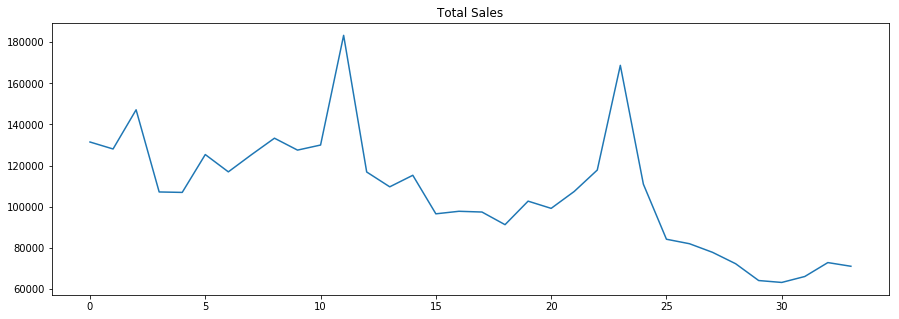

In [8]:
# sales
df = pd.read_csv("sales_train.csv")

# change date to datetime
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# make date the index
df.set_index('date', drop=True, inplace=True)

# groupby month
gb = df.groupby('date_block_num')

# make a time series of total sales
ts = pd.Series(gb['item_cnt_day'].sum())

# plot time series
plt.figure(figsize=(15, 5))
plt.plot(ts)
plt.title('Total Sales')
plt.show()

## Baseline SARIMA

In [64]:
# orders
p = d = q = 1
P = Q = 1
D = 0

# model
model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, 12))

# fit
fit_model = model.fit()

# score
fit_model.aic

759.8500003908497